In [5]:
import random
import numpy as np

# Definir el conjunto de funciones
def AND(x, y):
    return x and y

def OR(x, y):
    return x or y

def NOT(x):
    return not x

def NOR(x, y):
    return not (x or y)

# Definir los nodos terminales
nodos_terminales = ['A', 'B', 'C']

# Definir la profundidad máxima de las expresiones
profundidad_maxima = 4
MAX = 4
DATA = np.genfromtxt('Paridad.csv', delimiter=',')

# Generar un individuo aleatorio
def generar_individuo(profundidad):
    if profundidad == 1:
        return random.choice(nodos_terminales)
    else:
        funcion = random.choice([AND, OR, NOT])
        if funcion == NOT:
            return [funcion.__name__, generar_individuo(profundidad - 1)]
        else:
            return [funcion.__name__, generar_individuo(profundidad - 1), generar_individuo(profundidad - 1)]

# Evaluar un individuo
def evaluar_individuo(individuo, entradas):
    if isinstance(individuo, str):
        return entradas[individuo]
    else:
        nombre_funcion = individuo[0]
        if nombre_funcion == 'AND':
            return AND(evaluar_individuo(individuo[1], entradas), evaluar_individuo(individuo[2], entradas))
        elif nombre_funcion == 'OR':
            return OR(evaluar_individuo(individuo[1], entradas), evaluar_individuo(individuo[2], entradas))
        elif nombre_funcion == 'NOT':
            return NOT(evaluar_individuo(individuo[1], entradas))
        elif nombre_funcion == 'NOR':
            return NOR(evaluar_individuo(individuo[1], entradas), evaluar_individuo(individuo[2], entradas))
        
def mutacion(individuo):
    sub = individuo.copy()
    indice_corte = obtener_indices(sub, MAX)
    max_subarbol = MAX - len(indice_corte)
    if max_subarbol <=0:
        max_subarbol = 1
    print("Indice corte: ", indice_corte)
    subarbol = generar_individuo(max_subarbol)
    nuevo_arbol = insertar_subarbol(individuo, indice_corte, subarbol)
    return nuevo_arbol


def obtener_indices(nested_list, profundidad_maxima, probabilidad_mutacion=0.1):
    '''
    Funcion que regresa los indices del bloque que se modificará en un individuo
    '''
    nested_list = nested_list.copy()
    indices = []
    for i in range(profundidad_maxima):
        if isinstance(nested_list, list):  
            indices.append(random.randint(0, len(nested_list) - 1))
            nested_list = nested_list[indices[i]]
        else:
            break
    return indices[:random.randint(1, len(indices))]

def insertar_subarbol(arbol, indices, subarbol):
    nuevo_arbol = arbol.copy()
    for i in range(len(indices)):
        if indices[i] == 0:
            break

    # Este if es temporal para solucionar un bug
    if i == 0:
        nuevo_arbol = subarbol
    elif i == 1:
        nuevo_arbol[indices[0]] = subarbol
    elif i == 2:
        nuevo_arbol[indices[0]][indices[1]] = subarbol
    elif i == 3:       
        nuevo_arbol[indices[0]][indices[1]][indices[2]] = subarbol
    elif i == 4:
        nuevo_arbol[indices[0]][indices[1]][indices[2]][indices[3]] = subarbol
    elif i == 5:
        nuevo_arbol[indices[0]][indices[1]][indices[2]][indices[3]][indices[4]] = subarbol
    elif i == 6:
        nuevo_arbol[indices[0]][indices[1]][indices[2]][indices[3]][indices[4]][indices[5]] = subarbol
    elif i == 7:
        nuevo_arbol[indices[0]][indices[1]][indices[2]][indices[3]][indices[4]][indices[5]][indices[6]] = subarbol
    elif i == 8:
        nuevo_arbol[indices[0]][indices[1]][indices[2]][indices[3]][indices[4]][indices[5]][indices[6]][indices[7]] = subarbol
    elif i == 9:
        nuevo_arbol[indices[0]][indices[1]][indices[2]][indices[3]][indices[4]][indices[5]][indices[6]][indices[7]][indices[8]] = subarbol
    elif i == 10:
        nuevo_arbol[indices[0]][indices[1]][indices[2]][indices[3]][indices[4]][indices[5]][indices[6]][indices[7]][indices[8]][indices[9]] = subarbol
    return nuevo_arbol

def cruza(individuo1, individuo2, prob_cruza=0.8):
    sub1 = individuo1.copy()
    sub2 = individuo2.copy()
    if random.random() > prob_cruza:
        return sub1, sub2
    indice_corte1 = obtener_indices(sub1, MAX)
    indice_corte2 = obtener_indices(sub2, MAX)
    nuevo_arbol1 = insertar_subarbol(individuo1, indice_corte1, sub2)
    nuevo_arbol2 = insertar_subarbol(individuo2, indice_corte2, sub1)
    return nuevo_arbol1, nuevo_arbol2

def seleccion_ruleta(poblacion,  fitness):
    '''
    Funcion que regresa dos padres para la cruza segun el metodo de ruleta
    '''
    total = sum(fitness)
    ruleta = [f/total for f in fitness]
    padres = []
    for i in range(2):
        r = random.random()
        suma = 0
        for j in range(len(ruleta)):
            suma += ruleta[j]
            if r < suma:
                padres.append(poblacion[j])
                break
    return padres

def evaluar_arbol_completo(arbol):
    # funcion que evalua el arbol para todas las combinaciones de la tabla de verdad
    correctas = 0
    incorrectas = 0
    for i in DATA:
        entradas = {'A': i[0], 'B': i[1], 'C': i[2]}
        prediccion = evaluar_individuo(arbol, entradas)
        # print("Prediccion: ", prediccion)
        # print("Respuesta esperada: ", i[3])
        if prediccion == i[3]:
            correctas += 1
        else:
            incorrectas += 1
    fitness = correctas/(correctas+incorrectas)
    # print("Correctas: ", correctas)
    # print("Incorrectas: ", incorrectas)
    # print("Porcentaje de acierto: ",fitness)
    return fitness

def correr_generaciones(tam_poblacion, num_generaciones, prob_mutacion):
    fitness_generacion = []
    poblacion = []
    for i in range(tam_poblacion):
        poblacion.append(generar_individuo(MAX))
    for i in range(num_generaciones):
        fitness = []
        for individuo in poblacion:
            fitness.append(evaluar_arbol_completo(individuo))
        fitness_generacion.append(sum(fitness)/len(fitness))
        nueva_poblacion = []
        for j in range(tam_poblacion//2):
            padres = seleccion_ruleta(poblacion, fitness)
            hijo1, hijo2 = cruza(padres[0], padres[1])
            nueva_poblacion.append(mutacion(hijo1))
            nueva_poblacion.append(mutacion(hijo2))
        poblacion = nueva_poblacion
        print("Generacion: ", i)
        print("Fitness: ", fitness_generacion[i])
    return poblacion, fitness_generacion

poblacion, fitness = correr_generaciones(100, 1000, 0.1)



Indice corte:  [2, 0]
Indice corte:  [2]
Indice corte:  [2]
Indice corte:  [1, 0]
Indice corte:  [2]
Indice corte:  [0]
Indice corte:  [1, 0]
Indice corte:  [0]
Indice corte:  [1, 2]
Indice corte:  [1]
Indice corte:  [1, 0]
Indice corte:  [1]
Indice corte:  [0]
Indice corte:  [0]
Indice corte:  [1]
Indice corte:  [2, 0]
Indice corte:  [1]
Indice corte:  [1, 2, 1]
Indice corte:  [0]
Indice corte:  [2, 1, 0]
Indice corte:  [0]
Indice corte:  [1]
Indice corte:  [1, 0]
Indice corte:  [1, 1]
Indice corte:  [0]
Indice corte:  [0]
Indice corte:  [1]
Indice corte:  [0]
Indice corte:  [1, 1, 1, 0]
Indice corte:  [0]
Indice corte:  [2, 1]
Indice corte:  [0]
Indice corte:  [2]
Indice corte:  [0]
Indice corte:  [2]
Indice corte:  [0]
Indice corte:  [0]
Indice corte:  [0]
Indice corte:  [0]
Indice corte:  [1]
Indice corte:  [2, 1, 2]
Indice corte:  [1]
Indice corte:  [2]
Indice corte:  [1, 1]
Indice corte:  [0]
Indice corte:  [1, 1]
Indice corte:  [2, 0]
Indice corte:  [0]
Indice corte:  [1]
Indice

RecursionError: maximum recursion depth exceeded

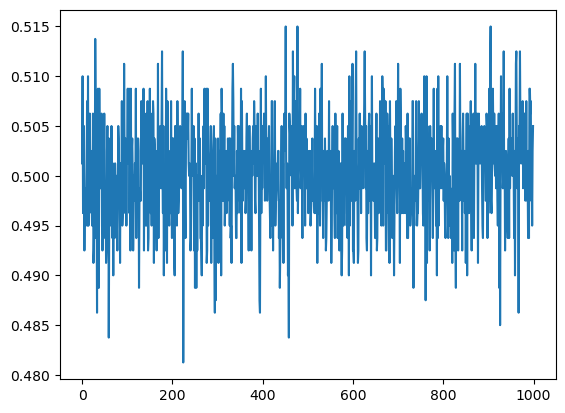

In [4]:
from matplotlib import pyplot as plt
plt.plot(fitness)
plt.show()


In [ ]:
a = generar_individuo(4)
indices = obtener_indices(a, 15)
b = generar_individuo(4)


indices = [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
a = ['NOT', ['OR', ['AND', 'A', 'A'], ['OR', 'B', 'C']]]
b = ['OR', ['AND', ['AND', 'A', 'B'], ['AND', 'B', 'B']], ['NOT', ['AND', 'C', 'B']]]


print("indices", indices)
print("individuo", a)   
print("subarbol", b)

In [ ]:
z = mutacion(a)

In [ ]:
hijo1, hijo2 = cruza(a, b)
print("Padre 1", a)
print("Padre 2", b)
print("Hijo 1 ", hijo1)
print("Hijo 2 ", hijo2)

In [13]:
import random
import operator
import math
import numpy as np
from deap import algorithms, base, creator, tools

# Define the fitness function
def evaluate(individual):
    # Define the mapping from terminals to values
    terminal_map = {'A': 1, 'B': 0, 'C': 1}
    
    # Define the mapping from operators to functions
    operator_map = {'AND': operator.and_, 'OR': operator.or_, 'NOT': operator.not_}
    
    # Convert the individual to a string
    expression = ''.join(individual)
    
    # Replace terminals with values and operators with functions
    expression = ''.join([terminal_map.get(node, node) for node in expression])
    expression = ''.join([operator_map.get(op, op) for op in expression])
    
    # Evaluate the expression using Python's eval function
    result = eval(expression)
    
    # Calculate the fitness (absolute difference from target value)
    target_value = 1  # Example target value
    fitness = abs(result - target_value)
    
    return fitness,

# Define the creator for the individual and fitness
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Define the toolbox
toolbox = base.Toolbox()

# Register the necessary functions
toolbox.register("attr_bool", random.choice, ['A', 'B', 'C', 'AND', 'OR', 'NOT'])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def main():
    random.seed(42)
    
    # Create an initial population
    population = toolbox.population(n=300)
    
    # Define the statistics to keep track of during evolution
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)
    
    # Run the genetic algorithm
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, stats=stats, verbose=True)
    
    # Print the best individual at the end of evolution
    best_ind = tools.selBest(population, k=1)[0]
    print("Best individual:", ''.join(best_ind))

main()


TypeError: sequence item 3: expected str instance, int found